In [12]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IGNORE. Data1 is 2 years old.

In [ ]:
# data1 = pd.read_json("/content/drive/MyDrive/Colab Notebooks/195E Project/Data/wsbData.json", lines= True)
# data1

In [ ]:
# d1 = data1[['author','created_utc', 'subreddit', 'body']]
# d1.head()

# Data 2 last updated 3/11/21 
(https://www.kaggle.com/leukipp/reddit-finance-data)
# Contains post submissions in WSB

In [3]:
data2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/195E Project/Data/submissions_reddit.csv")
data2

,id,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,is_self,is_video,is_original_content,title,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,thumbnail,shortlink
0,ko124i,[deleted],2021-01-01 00:02:06,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,1,1,1,0,0,"3k - 170k since March (Also, buy LIT!!)",Gain,1.00,34,0,1,14,0,[deleted],default,https://redd.it/ko124i
1,ko12uq,[deleted],2021-01-01 00:03:20,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,1,1,0,0,0,Got out of PLTR calls after learning about IV ...,Gain,1.00,2,0,0,0,0,[deleted],default,https://redd.it/ko12uq
2,ko13df,[deleted],2021-01-01 00:04:11,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,1,1,0,0,0,Hell of a headline,Meme,0.88,13,0,0,7,0,[deleted],default,https://redd.it/ko13df
3,ko17yf,shirotimatim,2021-01-01 00:11:51,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,0,0,0,0,0,"Top popular stocks on WSB too! Also, why they ...",News,0.92,183,0,0,26,0,NaN,https://b.thumbs.redditmedia.com/LmWdNB0W1qHT0...,https://redd.it/ko17yf
4,ko1a4i,WSBVoteBot,2021-01-01 00:15:38,2021-02-02 21:52:13,1970-01-01 00:00:00,0,0,0,0,0,1,0,0,WSBVoteBot Log for Jan 01 2021,None,0.50,0,0,0,19,0,Every time a new submission is posted to walls...,self,https://redd.it/ko1a4i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475845,m3cadm,TriopsTown,2021-03-12 07:08:51,2021-03-12 07:16:18,1970-01-01 00:00:00,0,0,0,1,0,0,0,0,"Good Morning, Germany is Open !",News,1.00,1,0,0,1,0,NaN,https://a.thumbs.redditmedia.com/kQp0N-CxuXtaI...,https://redd.it/m3cadm
475846,m3cafr,ma7994,2021-03-12 07:09:00,2021-03-12 07:16:18,1970-01-01 00:00:00,0,0,0,1,0,1,0,0,GMEs impact on the broader market,Technical Analysis,1.00,1,0,0,0,0,[removed],self,https://redd.it/m3cafr
475847,m3cbb6,Mabiggerbiggest,2021-03-12 07:10:48,2021-03-12 07:16:18,1970-01-01 00:00:00,0,0,0,1,0,0,0,0,😂😂😂😂😂😂😂 killed it!!,Meme,1.00,1,0,0,0,0,NaN,https://b.thumbs.redditmedia.com/hJJyuagnBOShw...,https://redd.it/m3cbb6
475848,m3cbk0,[deleted],2021-03-12 07:11:18,2021-03-12 07:16:18,1970-01-01 00:00:00,0,0,0,1,1,0,0,0,Why is this suddenly here? My Gold renewed tod...,Discussion,1.00,1,0,0,0,0,[deleted],default,https://redd.it/m3cbk0


In [4]:
data2.replace('[deleted]', np.nan, inplace =True)
d2 = data2[['title', 'selftext', 'created']]
d2.columns = ['title', 'body', 'timestamp'] # Renames columns
d2

,title,body,timestamp
0,"3k - 170k since March (Also, buy LIT!!)",NaN,2021-01-01 00:02:06
1,Got out of PLTR calls after learning about IV ...,NaN,2021-01-01 00:03:20
2,Hell of a headline,NaN,2021-01-01 00:04:11
3,"Top popular stocks on WSB too! Also, why they ...",NaN,2021-01-01 00:11:51
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38
...,...,...,...
475845,"Good Morning, Germany is Open !",NaN,2021-03-12 07:08:51
475846,GMEs impact on the broader market,[removed],2021-03-12 07:09:00
475847,😂😂😂😂😂😂😂 killed it!!,NaN,2021-03-12 07:10:48
475848,Why is this suddenly here? My Gold renewed tod...,NaN,2021-03-12 07:11:18


In [5]:
type(d2['timestamp'][9000])

str

# Data 3. Last updated Feb 2021. 
(https://www.kaggle.com/nikolaimelnikov/rwallstreetbets-comments-1120-till-1130)
# These are purely comments on posts. Look pretty clean.

In [6]:
# Data 3. Last updated Feb 2021. (https://www.kaggle.com/nikolaimelnikov/rwallstreetbets-comments-1120-till-1130)
# These are purely comments on posts.
data3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/195E Project/Data/comments_2021-1-1_2021-11-29_new.csv")
data3

,Unnamed: 0,Date,Time,Body
0,0,2021-01-01,1609498834,gay
1,1,2021-01-01,1609498865,Daily discussion? About whattt
2,2,2021-01-01,1609498866,PLTR 100 2022
3,3,2021-01-01,1609498913,Twenty twenty won.
4,4,2021-01-01,1609498930,"So Mark, how's your sex life?"
...,...,...,...,...
553480,700123,2021-01-29,1611931707,&gt;f you cannot buy more GME shares and have ...
553481,700125,2021-01-29,1611931707,RIP GME paperhands lol
553482,700128,2021-01-29,1611931707,Yes
553483,700134,2021-01-29,1611931707,$SLV 🚀🚀🚀🏦🔫


In [13]:
def time_conversion(time):
    return datetime.datetime.fromtimestamp(
        int(time)
    ).strftime('%Y-%m-%d %H:%M:%S')

time_conversion(1611931707)

'2021-01-29 14:48:27'

In [14]:
data3['timestamp'] = data3['Time'].apply(lambda x: time_conversion(x))

In [15]:
data3

,Unnamed: 0,Date,Time,Body,timestamp
0,0,2021-01-01,1609498834,gay,2021-01-01 11:00:34
1,1,2021-01-01,1609498865,Daily discussion? About whattt,2021-01-01 11:01:05
2,2,2021-01-01,1609498866,PLTR 100 2022,2021-01-01 11:01:06
3,3,2021-01-01,1609498913,Twenty twenty won.,2021-01-01 11:01:53
4,4,2021-01-01,1609498930,"So Mark, how's your sex life?",2021-01-01 11:02:10
...,...,...,...,...,...
553480,700123,2021-01-29,1611931707,&gt;f you cannot buy more GME shares and have ...,2021-01-29 14:48:27
553481,700125,2021-01-29,1611931707,RIP GME paperhands lol,2021-01-29 14:48:27
553482,700128,2021-01-29,1611931707,Yes,2021-01-29 14:48:27
553483,700134,2021-01-29,1611931707,$SLV 🚀🚀🚀🏦🔫,2021-01-29 14:48:27


In [16]:
d3 = data3[['Body', 'timestamp']]
d3.columns = ['body', 'timestamp']
d3

,body,timestamp
0,gay,2021-01-01 11:00:34
1,Daily discussion? About whattt,2021-01-01 11:01:05
2,PLTR 100 2022,2021-01-01 11:01:06
3,Twenty twenty won.,2021-01-01 11:01:53
4,"So Mark, how's your sex life?",2021-01-01 11:02:10
...,...,...
553480,&gt;f you cannot buy more GME shares and have ...,2021-01-29 14:48:27
553481,RIP GME paperhands lol,2021-01-29 14:48:27
553482,Yes,2021-01-29 14:48:27
553483,$SLV 🚀🚀🚀🏦🔫,2021-01-29 14:48:27


In [17]:
d3['title'] = np.nan
d3_comp = d3[['title', 'body', 'timestamp']]
d3_comp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,body,timestamp
0,NaN,gay,2021-01-01 11:00:34
1,NaN,Daily discussion? About whattt,2021-01-01 11:01:05
2,NaN,PLTR 100 2022,2021-01-01 11:01:06
3,NaN,Twenty twenty won.,2021-01-01 11:01:53
4,NaN,"So Mark, how's your sex life?",2021-01-01 11:02:10
...,...,...,...
553480,NaN,&gt;f you cannot buy more GME shares and have ...,2021-01-29 14:48:27
553481,NaN,RIP GME paperhands lol,2021-01-29 14:48:27
553482,NaN,Yes,2021-01-29 14:48:27
553483,NaN,$SLV 🚀🚀🚀🏦🔫,2021-01-29 14:48:27


# Data 4. Last updated 3/12/21.
 (https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts)
# Used in main project notebook.


In [18]:
# Data 4. Last updated 3/12/21. (https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts)
data4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/195E Project/Data/reddit_wsb.csv")
data4

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
40801,It’s not much. But it’s honest work!,62,m1fx90,https://i.redd.it/hd89zwiwe2m61.jpg,11,1.615352e+09,NaN,2021-03-10 06:48:55
40802,Diversify? Who is that?,64,m1fv4q,https://i.redd.it/9yxkh5ofe2m61.jpg,20,1.615352e+09,NaN,2021-03-10 06:46:18
40803,I like the stock,58,m1fsqr,https://i.redd.it/p91ppluvd2m61.jpg,7,1.615351e+09,NaN,2021-03-10 06:43:12
40804,a little bit of a recovery from last month😂,33,m1fshu,https://www.reddit.com/gallery/m1fshu,6,1.615351e+09,NaN,2021-03-10 06:42:54


In [19]:
d4 = data4[['title', 'created', 'body', 'timestamp']]
d4.head()

,title,created,body,timestamp
0,"It's not about the money, it's about sending a...",1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",1.611862e+09,NaN,2021-01-28 21:26:56


In [20]:
# del d4['created'] # Can only run once before deleted.
d4

,title,created,body,timestamp
0,"It's not about the money, it's about sending a...",1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...
40801,It’s not much. But it’s honest work!,1.615352e+09,NaN,2021-03-10 06:48:55
40802,Diversify? Who is that?,1.615352e+09,NaN,2021-03-10 06:46:18
40803,I like the stock,1.615351e+09,NaN,2021-03-10 06:43:12
40804,a little bit of a recovery from last month😂,1.615351e+09,NaN,2021-03-10 06:42:54


In [21]:
type(d4['timestamp'][9000])

str

# Data 5. Last updated Feb 2021. 
(https://www.kaggle.com/yorkehead/stock-market-subreddits)

Condensed to include data only from wsb and none from other related subreddits.



In [22]:
data5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/195E Project/Data/reddit.csv")
data5

,title,score,subreddit,url,num_comments,body,date
0,UPVOTE so everyone sees we got SUPPORT,265029,wallstreetbets,https://i.redd.it/sgoqy8nyt2e61.png,11825,NaN,2021-01-29 00:40:34
1,GME YOLO update — Jan 28 2021,230844,wallstreetbets,https://i.redd.it/opzucppb15e61.png,23532,NaN,2021-01-29 08:06:23
2,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,204920,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,18318,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-29 00:49:11
3,GME YOLO update — Jan 27 2021 ----------------...,185949,wallstreetbets,https://i.redd.it/a309gkm5yxd61.png,15495,NaN,2021-01-28 08:15:35
4,Can we all take a moment and appreciate the Mo...,184517,wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,7105,NaN,2021-01-28 11:57:32
...,...,...,...,...,...,...,...
2920,DID WE MISS THE BOTTOM?! How are people this i...,348,stocks,https://www.reddit.com/r/stocks/comments/g1m6u...,283,My mind is blown that so many people are convi...,2020-04-15 17:03:23
2921,Favorite Solar Stock(s)?,348,stocks,https://www.reddit.com/r/stocks/comments/jmct3...,176,"Hey there, I was wondering what everyone's pre...",2020-11-02 10:46:49
2922,"""NIO forms battery asset company""",352,stocks,https://www.reddit.com/r/stocks/comments/id8z3...,102,"Nio has now launched ""baas"" they places over 1...",2020-08-20 23:02:48
2923,Amazon is building a $1.5 billion hub for its ...,349,stocks,https://www.reddit.com/r/stocks/comments/5rghg...,145,Need another sign that Amazon is dead serious ...,2017-02-02 03:35:04


In [23]:
d5 = data5[['title', 'subreddit', 'body', 'date']]
d5.head()

,title,subreddit,body,date
0,UPVOTE so everyone sees we got SUPPORT,wallstreetbets,NaN,2021-01-29 00:40:34
1,GME YOLO update — Jan 28 2021,wallstreetbets,NaN,2021-01-29 08:06:23
2,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,wallstreetbets,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-29 00:49:11
3,GME YOLO update — Jan 27 2021 ----------------...,wallstreetbets,NaN,2021-01-28 08:15:35
4,Can we all take a moment and appreciate the Mo...,wallstreetbets,NaN,2021-01-28 11:57:32


In [24]:
d5_wsb = d5[d5['subreddit'] == 'wallstreetbets'] # Extracts all rows with data from r/wallstreetbets
d5_wsb

,title,subreddit,body,date
0,UPVOTE so everyone sees we got SUPPORT,wallstreetbets,NaN,2021-01-29 00:40:34
1,GME YOLO update — Jan 28 2021,wallstreetbets,NaN,2021-01-29 08:06:23
2,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,wallstreetbets,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-29 00:49:11
3,GME YOLO update — Jan 27 2021 ----------------...,wallstreetbets,NaN,2021-01-28 08:15:35
4,Can we all take a moment and appreciate the Mo...,wallstreetbets,NaN,2021-01-28 11:57:32
...,...,...,...,...
948,Its not Robinhood’s fault this time,wallstreetbets,NaN,2020-09-22 16:23:24
949,Robinhood be like...,wallstreetbets,NaN,2019-01-07 19:43:41
950,Paper hands can turn into diamond (credit to /...,wallstreetbets,NaN,2021-01-28 20:24:39
951,Boeing 737 runs over and kills a bear while la...,wallstreetbets,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17


In [25]:
del d5_wsb['subreddit'] #Run if need to remove 'subreddit' column
d5_wsb.columns = ['title', 'body', 'timestamp'] # Renames columns
d5_wsb

,title,body,timestamp
0,UPVOTE so everyone sees we got SUPPORT,NaN,2021-01-29 00:40:34
1,GME YOLO update — Jan 28 2021,NaN,2021-01-29 08:06:23
2,CLASS ACTION AGAINST ROBINHOOD. Allowing peopl...,LEAVE ROBINHOOD. They dont deserve to make mon...,2021-01-29 00:49:11
3,GME YOLO update — Jan 27 2021 ----------------...,NaN,2021-01-28 08:15:35
4,Can we all take a moment and appreciate the Mo...,NaN,2021-01-28 11:57:32
...,...,...,...
948,Its not Robinhood’s fault this time,NaN,2020-09-22 16:23:24
949,Robinhood be like...,NaN,2019-01-07 19:43:41
950,Paper hands can turn into diamond (credit to /...,NaN,2021-01-28 20:24:39
951,Boeing 737 runs over and kills a bear while la...,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17


In [26]:
d5_wsb['timestamp'] #ideal way to format time stamps [year-mo-day] [hr:min:sec] in military time

0      2021-01-29 00:40:34
1      2021-01-29 08:06:23
2      2021-01-29 00:49:11
3      2021-01-28 08:15:35
4      2021-01-28 11:57:32
              ...         
948    2020-09-22 16:23:24
949    2019-01-07 19:43:41
950    2021-01-28 20:24:39
951    2020-11-16 22:14:17
952    2020-11-30 20:32:01
Name: timestamp, Length: 953, dtype: object

In [27]:
type(d5_wsb['timestamp'][900])

str

# All data is ready to be merged together.
- Should text in data3 be considered body or should I add a new column for comments?

In [28]:
frames = [d2, d4, d5_wsb] # Excluding d3_comp
concat_df = pd.concat(frames)
concat_df

,title,body,timestamp,created
0,"3k - 170k since March (Also, buy LIT!!)",NaN,2021-01-01 00:02:06,NaN
1,Got out of PLTR calls after learning about IV ...,NaN,2021-01-01 00:03:20,NaN
2,Hell of a headline,NaN,2021-01-01 00:04:11,NaN
3,"Top popular stocks on WSB too! Also, why they ...",NaN,2021-01-01 00:11:51,NaN
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38,NaN
...,...,...,...,...
948,Its not Robinhood’s fault this time,NaN,2020-09-22 16:23:24,NaN
949,Robinhood be like...,NaN,2019-01-07 19:43:41,NaN
950,Paper hands can turn into diamond (credit to /...,NaN,2021-01-28 20:24:39,NaN
951,Boeing 737 runs over and kills a bear while la...,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17,NaN


In [29]:
# Complete combined dataframe for WSB posts. Contains 4 datasets: d2, d3_comp, d4, d5_wsb
wsb_df = d2.append([d3_comp, d4, d5_wsb], ignore_index= True, sort= False)
wsb_df

,title,body,timestamp,created
0,"3k - 170k since March (Also, buy LIT!!)",NaN,2021-01-01 00:02:06,NaN
1,Got out of PLTR calls after learning about IV ...,NaN,2021-01-01 00:03:20,NaN
2,Hell of a headline,NaN,2021-01-01 00:04:11,NaN
3,"Top popular stocks on WSB too! Also, why they ...",NaN,2021-01-01 00:11:51,NaN
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38,NaN
...,...,...,...,...
1071089,Its not Robinhood’s fault this time,NaN,2020-09-22 16:23:24,NaN
1071090,Robinhood be like...,NaN,2019-01-07 19:43:41,NaN
1071091,Paper hands can turn into diamond (credit to /...,NaN,2021-01-28 20:24:39,NaN
1071092,Boeing 737 runs over and kills a bear while la...,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17,NaN


In [30]:
wsb_df['title'][39943] # Some values have ['removed'] in body. Fix!

'Goooo Baalls Deeeeep in BB or this retard homeless'

In [31]:
wsb_df['timestamp']

0          2021-01-01 00:02:06
1          2021-01-01 00:03:20
2          2021-01-01 00:04:11
3          2021-01-01 00:11:51
4          2021-01-01 00:15:38
                  ...         
1071089    2020-09-22 16:23:24
1071090    2019-01-07 19:43:41
1071091    2021-01-28 20:24:39
1071092    2020-11-16 22:14:17
1071093    2020-11-30 20:32:01
Name: timestamp, Length: 1071094, dtype: object

In [ ]:
## To save df as .csv
# wsb_df.to_csv('wsb_df.csv')
# !cp wsb_df.csv "drive/My Drive/"


SyntaxError: ignored

## Testing timeplot with wsb_df

In [ ]:


# x = wsb_df['timestamp']
# y = wsb_df['timestamp']
# plt.plot(x,y)

# plt.show()

KeyboardInterrupt: ignored

In [32]:
# Function for number of words in a string
def word_count(string_words):
    word_list = string_words.split()
    number_of_words = len(word_list)
    return number_of_words
# string_word = 'economics can be very hard'
word_count('economics can be very hard')

5

In [33]:
wsb_df['title']=wsb_df['title'].fillna("[empty]")
wsb_df['body'] = wsb_df['body'].fillna("[empty]")
wsb_df.head()

,title,body,timestamp,created
0,"3k - 170k since March (Also, buy LIT!!)",[empty],2021-01-01 00:02:06,NaN
1,Got out of PLTR calls after learning about IV ...,[empty],2021-01-01 00:03:20,NaN
2,Hell of a headline,[empty],2021-01-01 00:04:11,NaN
3,"Top popular stocks on WSB too! Also, why they ...",[empty],2021-01-01 00:11:51,NaN
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38,NaN


In [34]:
# creates another column title_word_count by counting breaks in strings with spaces
wsb_df['title_word_count'] = wsb_df['title'].apply(lambda x: word_count(x))
wsb_df['body_word_count'] = wsb_df['body'].apply(lambda x: word_count(x))

In [35]:
wsb_df['title']=wsb_df['title'].replace({"[removed]":"[empty]"})
wsb_df['body'] = wsb_df['body'].replace({"[removed]":"[empty]"})
wsb_df

,title,body,timestamp,created,title_word_count,body_word_count
0,"3k - 170k since March (Also, buy LIT!!)",[empty],2021-01-01 00:02:06,NaN,8,1
1,Got out of PLTR calls after learning about IV ...,[empty],2021-01-01 00:03:20,NaN,36,1
2,Hell of a headline,[empty],2021-01-01 00:04:11,NaN,4,1
3,"Top popular stocks on WSB too! Also, why they ...",[empty],2021-01-01 00:11:51,NaN,17,1
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38,NaN,6,66
...,...,...,...,...,...,...
1071089,Its not Robinhood’s fault this time,[empty],2020-09-22 16:23:24,NaN,6,1
1071090,Robinhood be like...,[empty],2019-01-07 19:43:41,NaN,3,1
1071091,Paper hands can turn into diamond (credit to /...,[empty],2021-01-28 20:24:39,NaN,9,1
1071092,Boeing 737 runs over and kills a bear while la...,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17,NaN,21,137


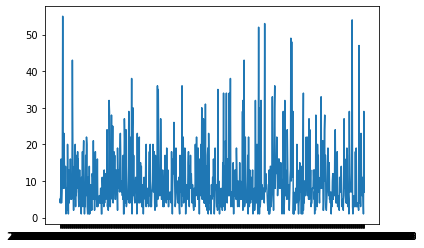

In [36]:
x = wsb_df['timestamp'][29093:29896]
y = wsb_df['title_word_count'][29093:29896]
plt.plot(x,y)

plt.show()

In [37]:
wsb_df[23500:23600]

,title,body,timestamp,created,title_word_count,body_word_count
23500,Tesla wins with data. Everyone else = Boeing 7...,[empty],2021-01-21 05:41:24,NaN,10,1
23501,HOLDING THE LINE WITH 1000 SHARES OF GME AMMUN...,[empty],2021-01-21 05:42:48,NaN,20,1
23502,Danimer DD - PHAs (BioPlastics) - PEG Analysis...,[empty],2021-01-21 05:43:52,NaN,9,1
23503,Someone should start a YOLO etf,[empty],2021-01-21 05:44:00,NaN,6,1
23504,"I have Never seen this type of Unity , Brother...",[empty],2021-01-21 05:44:18,NaN,41,1
...,...,...,...,...,...,...
23595,Market gonna crash soon (my dd),[empty],2021-01-21 08:00:40,NaN,6,1
23596,$NNDM positions. I'm probably in the wrong roc...,[empty],2021-01-21 08:01:11,NaN,21,1
23597,WallStreetBets Bullied Me Into Buying $GME (Ga...,[empty],2021-01-21 08:03:33,NaN,7,1
23598,Selling my shares of AMD and buying 300 in INT...,[empty],2021-01-21 08:06:49,NaN,16,1


In [38]:
del wsb_df['created'] #Run if need to remove 'created' column
wsb_df

,title,body,timestamp,title_word_count,body_word_count
0,"3k - 170k since March (Also, buy LIT!!)",[empty],2021-01-01 00:02:06,8,1
1,Got out of PLTR calls after learning about IV ...,[empty],2021-01-01 00:03:20,36,1
2,Hell of a headline,[empty],2021-01-01 00:04:11,4,1
3,"Top popular stocks on WSB too! Also, why they ...",[empty],2021-01-01 00:11:51,17,1
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38,6,66
...,...,...,...,...,...
1071089,Its not Robinhood’s fault this time,[empty],2020-09-22 16:23:24,6,1
1071090,Robinhood be like...,[empty],2019-01-07 19:43:41,3,1
1071091,Paper hands can turn into diamond (credit to /...,[empty],2021-01-28 20:24:39,9,1
1071092,Boeing 737 runs over and kills a bear while la...,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17,21,137


In [39]:
# wsb_df['title_lower'] = wsb_df['title'].apply(lambda x: word_count(x))
# wsb_df['body_lower'] = wsb_df['body'].apply(lambda x: word_count(x))

def lower_words(string_words):
    lower_str = string_words.lower()
    return lower_str

wsb_df['title_lower'] = wsb_df['title'].apply(lambda x: lower_words(x))
wsb_df['body_lower'] = wsb_df['body'].apply(lambda x: lower_words(x))

wsb_df

,title,body,timestamp,title_word_count,body_word_count,title_lower,body_lower
0,"3k - 170k since March (Also, buy LIT!!)",[empty],2021-01-01 00:02:06,8,1,"3k - 170k since march (also, buy lit!!)",[empty]
1,Got out of PLTR calls after learning about IV ...,[empty],2021-01-01 00:03:20,36,1,got out of pltr calls after learning about iv ...,[empty]
2,Hell of a headline,[empty],2021-01-01 00:04:11,4,1,hell of a headline,[empty]
3,"Top popular stocks on WSB too! Also, why they ...",[empty],2021-01-01 00:11:51,17,1,"top popular stocks on wsb too! also, why they ...",[empty]
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38,6,66,wsbvotebot log for jan 01 2021,every time a new submission is posted to walls...
...,...,...,...,...,...,...,...
1071089,Its not Robinhood’s fault this time,[empty],2020-09-22 16:23:24,6,1,its not robinhood’s fault this time,[empty]
1071090,Robinhood be like...,[empty],2019-01-07 19:43:41,3,1,robinhood be like...,[empty]
1071091,Paper hands can turn into diamond (credit to /...,[empty],2021-01-28 20:24:39,9,1,paper hands can turn into diamond (credit to /...,[empty]
1071092,Boeing 737 runs over and kills a bear while la...,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17,21,137,boeing 737 runs over and kills a bear while la...,boeing 737 ($ba) runs over and kills a ~~brown...


In [40]:
wsb_df

,title,body,timestamp,title_word_count,body_word_count,title_lower,body_lower
0,"3k - 170k since March (Also, buy LIT!!)",[empty],2021-01-01 00:02:06,8,1,"3k - 170k since march (also, buy lit!!)",[empty]
1,Got out of PLTR calls after learning about IV ...,[empty],2021-01-01 00:03:20,36,1,got out of pltr calls after learning about iv ...,[empty]
2,Hell of a headline,[empty],2021-01-01 00:04:11,4,1,hell of a headline,[empty]
3,"Top popular stocks on WSB too! Also, why they ...",[empty],2021-01-01 00:11:51,17,1,"top popular stocks on wsb too! also, why they ...",[empty]
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38,6,66,wsbvotebot log for jan 01 2021,every time a new submission is posted to walls...
...,...,...,...,...,...,...,...
1071089,Its not Robinhood’s fault this time,[empty],2020-09-22 16:23:24,6,1,its not robinhood’s fault this time,[empty]
1071090,Robinhood be like...,[empty],2019-01-07 19:43:41,3,1,robinhood be like...,[empty]
1071091,Paper hands can turn into diamond (credit to /...,[empty],2021-01-28 20:24:39,9,1,paper hands can turn into diamond (credit to /...,[empty]
1071092,Boeing 737 runs over and kills a bear while la...,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17,21,137,boeing 737 runs over and kills a bear while la...,boeing 737 ($ba) runs over and kills a ~~brown...


In [ ]:
## To save df as . 

In [41]:
wsb_df['body_lower'][678751]

'if goev isn’t bending over backwards for apple they have a fat cock and know something we don’t. bullish!'

# 4/5/21:
## Converting dates to numeric, adding column for detecting hashtags, rearrange columns, convert to 2 .csv (limit 1,048,576 in Excel)

In [42]:
wsb_df.head()

,title,body,timestamp,title_word_count,body_word_count,title_lower,body_lower
0,"3k - 170k since March (Also, buy LIT!!)",[empty],2021-01-01 00:02:06,8,1,"3k - 170k since march (also, buy lit!!)",[empty]
1,Got out of PLTR calls after learning about IV ...,[empty],2021-01-01 00:03:20,36,1,got out of pltr calls after learning about iv ...,[empty]
2,Hell of a headline,[empty],2021-01-01 00:04:11,4,1,hell of a headline,[empty]
3,"Top popular stocks on WSB too! Also, why they ...",[empty],2021-01-01 00:11:51,17,1,"top popular stocks on wsb too! also, why they ...",[empty]
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38,6,66,wsbvotebot log for jan 01 2021,every time a new submission is posted to walls...


In [43]:
# Testing whether timestamp is string or numeric
type(wsb_df['timestamp'][3])

str

In [45]:
# Converting timestamp from string to numeric
from datetime import datetime

def stamp_conversion(time_string):
    datetimeObj = datetime.strptime(time_string, '%Y-%m-%d %H:%M:%S')
    return datetimeObj

wsb_df['timestamp'] = wsb_df['timestamp'].apply(lambda x: stamp_conversion(x))

In [ ]:
# wsb_df.tail()

,title,body,timestamp,title_word_count,body_word_count,title_lower,body_lower
1071089,Its not Robinhood’s fault this time,[empty],2020-09-22 16:23:24,6,1,its not robinhood’s fault this time,[empty]
1071090,Robinhood be like...,[empty],2019-01-07 19:43:41,3,1,robinhood be like...,[empty]
1071091,Paper hands can turn into diamond (credit to /...,[empty],2021-01-28 20:24:39,9,1,paper hands can turn into diamond (credit to /...,[empty]
1071092,Boeing 737 runs over and kills a bear while la...,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17,21,137,boeing 737 runs over and kills a bear while la...,boeing 737 ($ba) runs over and kills a ~~brown...
1071093,Took a break from jacking off to check pre-mar...,[empty],2020-11-30 20:32:01,25,1,took a break from jacking off to check pre-mar...,[empty]


In [46]:
type(wsb_df['timestamp'][3])

pandas._libs.tslibs.timestamps.Timestamp

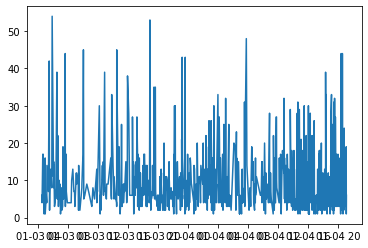

In [48]:
x = wsb_df['timestamp'][1000:2000]
y = wsb_df['title_word_count'][1000:2000]
plt.plot(x,y)

plt.show()

In [ ]:
# wsb_df[456:461]

,title,body,timestamp,title_word_count,body_word_count,title_lower,body_lower
456,Dr. PP Strikes again. Valuable Lesson on P/E R...,[empty],2021-01-02 00:35:15,9,1,dr. pp strikes again. valuable lesson on p/e r...,[empty]
457,Potential in coming real estate dip in 2021. A...,TLDR: I have no fucking clue what I am talking...,2021-01-02 00:36:23,25,748,potential in coming real estate dip in 2021. a...,tldr: i have no fucking clue what i am talking...
458,Where do degenerates fall on this spectrum?,[empty],2021-01-02 00:37:27,7,1,where do degenerates fall on this spectrum?,[empty]
459,Was Taylor Swift a Bear?,[empty],2021-01-02 00:37:58,5,1,was taylor swift a bear?,[empty]
460,DD - Digital Marketing,"Ladies, Gentleman, 🌈🐻's, and random OnlyFans h...",2021-01-02 00:47:27,4,1150,dd - digital marketing,"ladies, gentleman, 🌈🐻's, and random onlyfans h..."


In [49]:
# Creating a column for detecting hashtags

# function to print all the hashtags in a text
def extract_hashtags(title_text, body_text):

	
    # initializing hashtag_list variable
    hashtag_list = []

    # splitting the text into words
    for word in title_text.split():

    # checking the first charcter of every word
        if word[0] == '#':

    # adding the word to the hashtag_list
            hashtag_list.append(word[1:])

    for word in body_text.split():
        if word[0] == '#':
            hashtag_list.append(word[1:])


    # printing the hashtag_list
    for hashtag in hashtag_list:
        return hashtag

wsb_df['hashtags'] = wsb_df.apply(lambda x: extract_hashtags(x.title, x.body), axis=1)
# wsb_df['hashtags'] = wsb_df[['title', 'body']].apply(lambda x: extract_hashtags(x), axis=1)

In [ ]:
wsb_df[4389:4399]

,title,body,timestamp,title_word_count,body_word_count,title_lower,body_lower,hashtags,tickers
4389,If you use my refferal link then I will yolo t...,[empty],2021-01-07 18:03:19,21,1,if you use my refferal link then i will yolo t...,[empty],None,None
4390,Look what you retards did,[empty],2021-01-07 18:03:23,5,1,look what you retards did,[empty],None,None
4391,BABA Gang never give up! jia you! 加油,[empty],2021-01-07 18:04:31,8,1,baba gang never give up! jia you! 加油,[empty],None,None
4392,Pls use my refferal link so I can YOLO once ag...,[empty],2021-01-07 18:04:32,13,1,pls use my refferal link so i can yolo once ag...,[empty],None,None
4393,Live look at Elon speaking to his Teslanaires,[empty],2021-01-07 18:05:08,8,1,live look at elon speaking to his teslanaires,[empty],None,None
4394,AMC Stock go BBBRRRRRRRR,[empty],2021-01-07 18:05:17,4,1,amc stock go bbbrrrrrrrr,[empty],None,None
4395,"Took a expensive $14,000 option trading course...",[empty],2021-01-07 18:05:26,20,1,"took a expensive $14,000 option trading course...",[empty],None,"14,000"
4396,SOL is up 33% today and climbing,[empty],2021-01-07 18:05:41,7,1,sol is up 33% today and climbing,[empty],None,None
4397,$MGNI- 🌈🐻 Have created a amazing buying opport...,[empty],2021-01-07 18:05:52,10,1,$mgni- 🌈🐻 have created a amazing buying opport...,[empty],None,MGNI-
4398,Hey Elon lemme hold a quick billi to know what...,[empty],2021-01-07 18:06:27,13,1,hey elon lemme hold a quick billi to know what...,[empty],None,None


In [50]:
# Creating a column for detecting ticker

# function to print all the hashtags in a text
def extract_tickers(title_text, body_text):

	
    # initializing hashtag_list variable
    ticker_list = []
    dirty_list =[]

    # splitting the text into words
    for word in title_text.split():

    # checking the first charcter of every word
        if word[0] == '$':

    # adding the word to the hashtag_list
            dirty_list.append(word[1:])

            for item in dirty_list:
                if item.isnumeric() == False:
                    ticker_list.append(item)

    for word in body_text.split():
        if word[0] == '$':
            dirty_list.append(word[1:])

            for item in dirty_list:
                if item.isnumeric() == False:
                    ticker_list.append(item)

    # printing the hashtag_list
    for ticker in ticker_list:
        return ticker

wsb_df['tickers'] = wsb_df.apply(lambda x: extract_tickers(x.title, x.body), axis =1)
# wsb_df['hashtags'] = wsb_df[['title', 'body']].apply(lambda x: extract_hashtags(x), axis=1)

In [ ]:
wsb_df['hashtags'][37282:37292]

37282    None
37283    None
37284    None
37285    None
37286    None
37287    None
37288    None
37289    None
37290    None
37291    None
Name: hashtags, dtype: object

In [ ]:
wsb_df['tickers'][4397:4407] 

4397    MGNI-
4398     None
4399     None
4400     None
4401     None
4402     None
4403     None
4404     None
4405     None
4406     None
Name: tickers, dtype: object

In [51]:
wsb_df

,title,body,timestamp,title_word_count,body_word_count,title_lower,body_lower,hashtags,tickers
0,"3k - 170k since March (Also, buy LIT!!)",[empty],2021-01-01 00:02:06,8,1,"3k - 170k since march (also, buy lit!!)",[empty],None,None
1,Got out of PLTR calls after learning about IV ...,[empty],2021-01-01 00:03:20,36,1,got out of pltr calls after learning about iv ...,[empty],None,None
2,Hell of a headline,[empty],2021-01-01 00:04:11,4,1,hell of a headline,[empty],None,None
3,"Top popular stocks on WSB too! Also, why they ...",[empty],2021-01-01 00:11:51,17,1,"top popular stocks on wsb too! also, why they ...",[empty],None,None
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38,6,66,wsbvotebot log for jan 01 2021,every time a new submission is posted to walls...,None,None
...,...,...,...,...,...,...,...,...,...
1071089,Its not Robinhood’s fault this time,[empty],2020-09-22 16:23:24,6,1,its not robinhood’s fault this time,[empty],None,None
1071090,Robinhood be like...,[empty],2019-01-07 19:43:41,3,1,robinhood be like...,[empty],None,None
1071091,Paper hands can turn into diamond (credit to /...,[empty],2021-01-28 20:24:39,9,1,paper hands can turn into diamond (credit to /...,[empty],None,None
1071092,Boeing 737 runs over and kills a bear while la...,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17,21,137,boeing 737 runs over and kills a bear while la...,boeing 737 ($ba) runs over and kills a ~~brown...,None,None


In [52]:
wsb_simple_df = wsb_df[['title', 'body', 'timestamp']]
wsb_simple_df

,title,body,timestamp
0,"3k - 170k since March (Also, buy LIT!!)",[empty],2021-01-01 00:02:06
1,Got out of PLTR calls after learning about IV ...,[empty],2021-01-01 00:03:20
2,Hell of a headline,[empty],2021-01-01 00:04:11
3,"Top popular stocks on WSB too! Also, why they ...",[empty],2021-01-01 00:11:51
4,WSBVoteBot Log for Jan 01 2021,Every time a new submission is posted to walls...,2021-01-01 00:15:38
...,...,...,...
1071089,Its not Robinhood’s fault this time,[empty],2020-09-22 16:23:24
1071090,Robinhood be like...,[empty],2019-01-07 19:43:41
1071091,Paper hands can turn into diamond (credit to /...,[empty],2021-01-28 20:24:39
1071092,Boeing 737 runs over and kills a bear while la...,Boeing 737 ($BA) runs over and kills a ~~brown...,2020-11-16 22:14:17


In [ ]:
# Exporting to Github
from github import Github
from github import InputGitTreeElement

In [ ]:
# Create 2 separate dataframes for downloading as .csv
wsb_df_1 = wsb_df[0:535547]
wsb_df_2 = wsb_df[535547:1071094]

In [ ]:
wsb_df_1.shape

(535547, 9)

In [ ]:
# DOWNLOAD THIS ITERATION 4/5/21: Still need to clean tickers, a lot of $money
# wsb_df_1.to_csv('wsb_df_1.csv', index= False)
# !cp wsb_df_1.csv "drive/My Drive/"

# wsb_df_2.to_csv('wsb_df_2.csv', index = False)
# !cp wsb_df_2.csv "drive/My Drive/"